<a href="https://colab.research.google.com/github/YiHui000/Micro-assignment-2/blob/main/Unit3_Python_Advanced_Pandas_DataWrangling_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 : Python Data Analysis using salaries dataset

# Data Exploration:  This should include summary statistics, means, medians, quartiles, or any other relevant information about the data set. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/Salaries.csv')

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
# 397 rows = 397 employees
df.shape

(397, 7)

In [5]:
df.head()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [6]:
df.tail()

,Unnamed: 0,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329
396,397,AsstProf,A,8,4,Male,81035


In [7]:
df.describe()

,Unnamed: 0,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


# Mean/median of all salaries

In [10]:
# Mean of all salaries
df.mean()

Unnamed: 0          199.000000
yrs.since.phd        22.314861
yrs.service          17.614610
salary           113706.458438
dtype: float64

In [11]:
# Median of all salaries
df.median()

Unnamed: 0          199.0
yrs.since.phd        21.0
yrs.service          16.0
salary           107300.0
dtype: float64

# Median salary between gender and/or rank(title) Etc...


Making a new Data Frame that only has the columns 'sex' and 'salary'

In [14]:
dataset = df[['sex', 'salary']]
dataset.head()

,sex,salary
0,Male,139750
1,Male,173200
2,Male,79750
3,Male,115000
4,Male,141500


Finding the Median salary for all males

In [17]:
df_male = df[df['sex'] == 'Male']
male = df_male.median()
print(male)

Unnamed: 0          202.5
yrs.since.phd        22.0
yrs.service          18.0
salary           108043.0
dtype: float64


In [26]:
df_male = df[df['sex'] == 'Male']
df_male.groupby(['sex'])['salary'].median()

sex
Male    108043
Name: salary, dtype: int64

Finding the Median salary for all females

In [29]:
df_female = df[df['sex'] == 'Female']
female = df_female.median()
print(female)

Unnamed: 0          149.0
yrs.since.phd        17.0
yrs.service          10.0
salary           103750.0
dtype: float64


In [32]:
df_female = df[df['sex'] == 'Female']
df_female.groupby(['sex'])['salary'].median()

sex
Female    103750
Name: salary, dtype: int64

Comparing the Mean salary of Males and Females

In [33]:
male - female

Unnamed: 0         53.5
yrs.since.phd       5.0
yrs.service         8.0
salary           4293.0
dtype: float64

In [39]:
# The difference between mean salaries of male and female
Males_Mean_Salary = df_male[df_male['sex'] == 'Male'].mean()
print(Males_Mean_Salary)
print('\n')
Female_Mean_Salary = df_female[df_female['sex'] == 'Female'].mean()
print(Female_Mean_Salary)

Unnamed: 0          202.050279
yrs.since.phd        22.946927
yrs.service          18.273743
salary           115090.418994
dtype: float64


Unnamed: 0          171.000000
yrs.since.phd        16.512821
yrs.service          11.564103
salary           101002.410256
dtype: float64


# Data Wrangling – perform some basic transformations on the data

People who have 20 years of experience (Total: 157), (Mean Salary: 122,520.66)

In [45]:
people = df[['yrs.service','salary', 'sex']] 
experience = people[people['yrs.service'] == 20]
experience


,yrs.service,salary,sex
8,20,119250,Male
16,20,101000,Male
82,20,144640,Male
94,20,123683,Male
173,20,134185,Male
209,20,163200,Male
223,20,129600,Male
225,20,122400,Male
353,20,138000,Male
371,20,110515,Male


In [46]:
experience.mean()

yrs.service        20.0
salary         128647.3
dtype: float64

Comparing the salaries of people who have 20+ years of experience vs less than 20 years of experience

In [51]:
people = df[['yrs.service','salary', 'sex']] 
experience_1 = people[people['yrs.service'] >= 20]
experience_1

,yrs.service,salary,sex
3,39,115000,Male
4,41,141500,Male
6,23,175000,Male
7,45,147765,Male
8,20,119250,Male
...,...,...,...
384,21,125192,Male
386,27,139219,Male
388,36,119450,Male
392,30,103106,Male


In [52]:
experience_1.mean()

yrs.service        31.057325
salary         122520.656051
dtype: float64

In [53]:
people = df[['yrs.service','salary', 'sex']] 
experience_2 = people[people['yrs.service'] < 20]
experience_2

,yrs.service,salary,sex
0,18,139750,Male
1,16,173200,Male
2,3,79750,Male
5,6,97000,Male
9,18,129000,Female
...,...,...,...
390,19,166605,Male
391,19,151292,Male
393,19,150564,Male
395,15,95329,Male


In [54]:
experience_2.mean()

yrs.service         8.820833
salary         107940.504167
dtype: float64

People who have salary of greater than or equal to 200,000

In [60]:
people = df[['yrs.service','salary', 'sex','Unnamed: 0']] 
salary_1 = people[people['salary'] >= 200000]
salary_1

,yrs.service,salary,sex,Unnamed: 0
43,38,231545,Male,44
249,7,204000,Male,250
364,43,205500,Male,365


*Your* Findings here...

The diagram shows that there are 3 people have salary that are greater than 200,000 and all of they are male. The service years is 38 who have highest salary than other 2. and who have less salary who is short service years. 


# Rename values, subset columns, etc

In [69]:
df.rename(columns={'Unnamed: 0': 'Number',	'rank	discipline':'Rank','yrs.since.phd':'Year_Since_Phd','yrs.service':'Year_Service',	'sex':'Sex','salary':'Salary'}, inplace=True)
df

,Number,rank,discipline,Year_Since_Phd,Year_Service,Sex,Salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...,...
392,393,Prof,A,33,30,Male,103106
393,394,Prof,A,31,19,Male,150564
394,395,Prof,A,42,25,Male,101738
395,396,Prof,A,25,15,Male,95329


# Create some simple visualizations showing some simple statistics

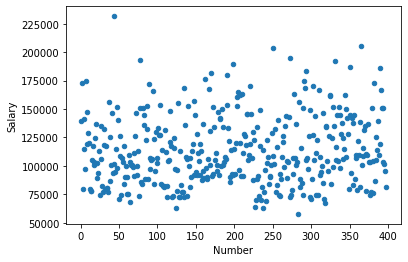

In [83]:
df.plot(kind='scatter', x='Number', y='Salary')

,Year_Service,Salary,Sex
0,18,139750,Male
1,16,173200,Male
2,3,79750,Male
5,6,97000,Male
9,18,129000,Female
...,...,...,...
390,19,166605,Male
391,19,151292,Male
393,19,150564,Male
395,15,95329,Male


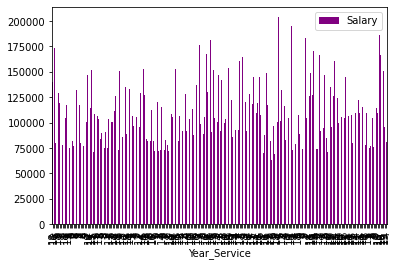

In [78]:
people = df[['Year_Service','Salary', 'Sex']] 
experience_2 = people[people['Year_Service'] < 20]
experience_2.plot(kind='bar',x='Year_Service',y='Salary', color = 'purple')
experience_2

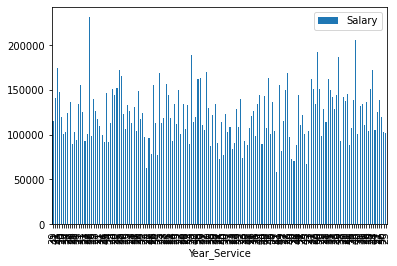

In [81]:
people = df[['Year_Service','Salary', 'Sex']] 
experience_1 = people[people['Year_Service'] >= 20]
experience_1.plot(kind='bar',x='Year_Service',y='Salary')
plt.show()

Your observations from the visuals:

> From the diagram of scatter, is easy to see people who's number is bettwen 50 have highest salary. From the diagram 2, is so density to show me the year_sevice, but we may guess, the higest salary and who's year_service less than 20 is trend to the right side. and the diagram 3, same as diagram 2, is density, but people who have highest salary and year service greater than or equal than 20 is trend to left.



# Draw some conclusions based on the data.  What did you discover?

Based on the analysis performed above, the conclusions are as follows:

Your Findings here
**The data shows above, people who have salary above or equal 200000 is 3 people and all of those are male.**



I also discovered that the -

 Your Findings here** People's salary will increase as they have long year service. males have higher salary than female.**




